Mean Squared Error: 0.004501201101435786
R-squared: 0.1506455486220637


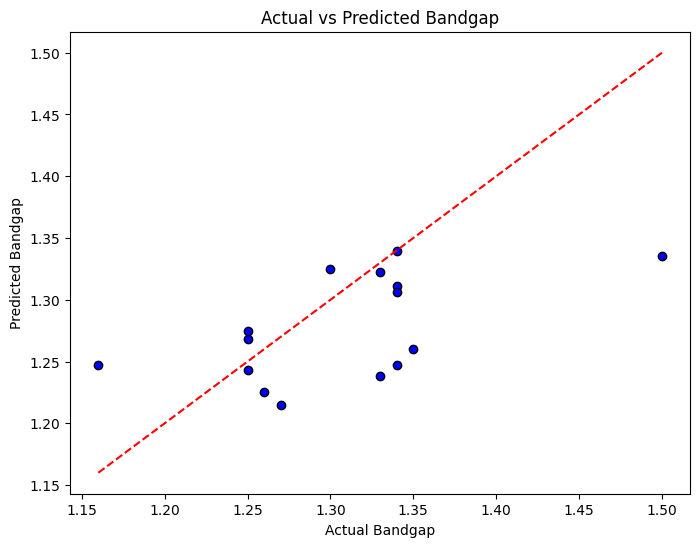

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

file_path = 'Lead + Tin 2.csv'  
data = pd.read_csv(file_path)
data = data.drop(columns=['ID'])
composition_columns = ['FA', 'MA', 'Cs', 'Pb', 'Sn', 'Br', 'I']
target_column = 'Bandgap'
data = data.dropna(subset=composition_columns + [target_column])

X = data[composition_columns]
y = data[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred = linear_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolors='black')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Line of perfect prediction
plt.title('Actual vs Predicted Bandgap')
plt.xlabel('Actual Bandgap')
plt.ylabel('Predicted Bandgap')
plt.show()